https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/

https://www.youtube.com/channel/UCICWIYEx2mo4wYZzLwJ7wVw

https://www.youtube.com/watch?v=SvmueyhSkgQ&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=8

In [1]:
# generate data
from sklearn.datasets import make_regression

#preprocessing
import pandas as pd
import numpy as np

#import models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#visual
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# class LinearRegression:
#     def __init__(self):
        

In [3]:
def generate_fake_data():
    X, y, coeff = make_regression(n_samples=1000,
                           n_features=1,
                           n_informative=1,
                           n_targets=1,
                           noise=15,
                           coef=True)
    return X, y , coeff

In [4]:
def create_dataframe():
    
    X, y, coeff = generate_fake_data()
    
    df_X = pd.DataFrame(X, columns=['feature_1','feature_2'])
    #display(df_X.head())
    df_y = pd.DataFrame(y, columns=['y_ground_truth'])
    #display(df_y.head())
    df_X_y = pd.merge(df_X, df_y, left_index=True, right_index=True)
    #display(df_X_y.head())
    
    return df_X_y, coeff

df_X_y, coeff = create_dataframe()
df_X_y.plot(kind='scatter', x='feature_1', y='y_ground_truth')
df_X_y.plot(kind='scatter', x='feature_2', y='y_ground_truth')

ValueError: Shape of passed values is (1000, 1), indices imply (1000, 2)

In [5]:
def split(X, y):
    return train_test_split(X, y , test_size = 0.2)

In [6]:
X, y, coeff = generate_fake_data()
X_train, X_test, y_train, y_test = split(X, y )
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
#display(model.predict([[30, 40]]))
print(model.intercept_)
print(model.coef_)

0.21068521739610335
[31.60484115]


In [7]:
def normalize(X):
    return (X - np.mean(X)/np.std(X))

$\hat{y} = w_0 + w_1*x$

In [104]:
def hypothesis(x, w):
    '''
    Return y_hat
    '''
    y_hat = w[0] + w[1]*x
    return y_hat

In [167]:
def gradient(X, Y, w):
    nrows = X.shape[0]
    #nfeatures = X.shape[1]
    #calc_gradient = np.zeros((nfeatures+1,))
    calc_gradient = np.zeros((2,)) # (nfeatures+1)
    for i in range(nrows):
        x = X[i]
        y_hat = hypothesis(x, w)
        y = Y[i]
        calc_gradient[0] = calc_gradient[0] + (-(y - y_hat))
        calc_gradient[1] = calc_gradient[1] + (-(y - y_hat)*x)
        
    return calc_gradient/nrows

In [180]:
def GadientDescent(X, y , max_steps, learning_rate):
    w = np.zeros((2,)) # (nfeatures+1)
    error_list = dict()
    for i in range(max_steps):
        grad = gradient(X, y , w)
        e = mean_error(X, y, w)
        error_list[i] = e
        # calc error in each iteration or step
        w[0] = w[0] - learning_rate*grad[0]
        w[1] = w[1] - learning_rate*grad[1]
        
    return w, error_list

In [169]:
def mean_error(X, y , w):
    nrows = X.shape[0]
    total_error = 0.0
    for i in range(nrows):
        y_hat = hypothesis(X[i],w)
        total_error = total_error + (y[i] - y_hat)**2
        
    return total_error/nrows

In [219]:
X, y, coeff = generate_fake_data()
y = y.reshape(-1,1)
X = normalize(X)
X_train, X_test, y_train, y_test = split(X, y)

In [246]:
# optimal weights obtained
w, error_list = GadientDescent(X_train, y_train, 200, 0.1)

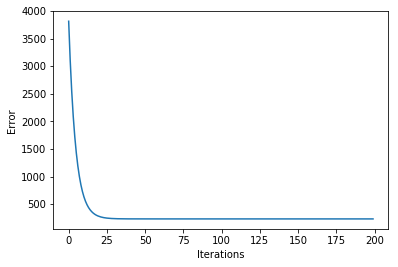

In [247]:
plt.plot(list(error_list.keys()),list(error_list.values()))
plt.ylabel('Error');
plt.xlabel('Iterations');

In [248]:
# Prediction of train data
y_hat = hypothesis(X_train, w)

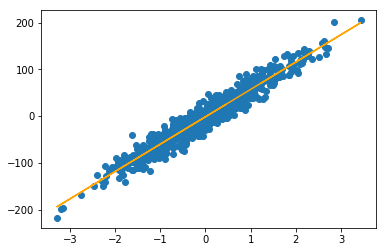

In [249]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_hat,color='orange',label='prediction')

In [250]:
# Prediction of test data
prediction = hypothesis(X_test, w)

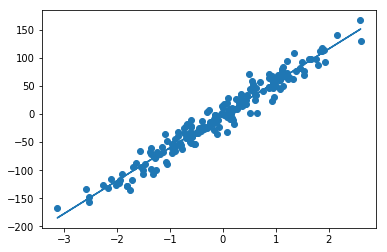

In [251]:
plt.scatter(X_test,y_test)
plt.plot(X_test, prediction)

In [252]:
# almost similar
w

array([-1.53246768, 58.64804756])

In [253]:
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
prediction_sklearn = model.predict(X_test)
#display(model.predict([[30, 40]]))
print(model_sklearn.intercept_)
print(model_sklearn.coef_)

[-1.53246769]
[[58.64804758]]


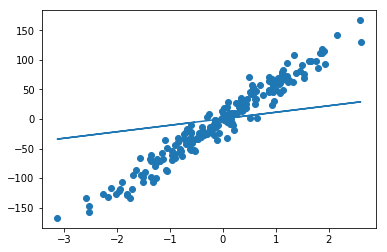

In [254]:
plt.scatter(X_test,y_test)
plt.plot(X_test, prediction_sklearn)

In [255]:
def custom_r2_score(y_test,y_pred):
    sse = np.sum((y_test-y_pred)**2)
    sst = np.sum((y_test-np.mean(y_test))**2)
    return 1-sse/sst

print('custom_r2_score : {0}'.format(custom_r2_score(y_test,prediction_sklearn)))
print('sklearn_r2_score : {0}'.format(r2_score(y_test,prediction_sklearn)))

custom_r2_score : 0.3202617407235261
sklearn_r2_score : 0.3202617407235261


In [256]:
def custom_r2_score(y_test,y_pred):
    sse = np.sum((y_test-y_pred)**2)
    sst = np.sum((y_test-np.mean(y_test))**2)
    return 1-sse/sst

print('custom_r2_score : {0}'.format(custom_r2_score(y_test,prediction)))
print('sklearn_r2_score : {0}'.format(r2_score(y_test,prediction)))

custom_r2_score : 0.9552355003957893
sklearn_r2_score : 0.9552355003957893


In [257]:
def custom_mse(y_test,y_pred):
    return np.sum((y_test-y_pred)**2)/len(y_test)

print('custom_mean_squared_error : {0}'.format(custom_mse(y_test,prediction_sklearn)))
print('sklearn_mean_squared_error : {0}'.format(mean_squared_error(y_test,prediction_sklearn)))

custom_mean_squared_error : 2912.7511016883486
sklearn_mean_squared_error : 2912.7511016883486


In [258]:
def custom_mse(y_test,y_pred):
    return np.sum((y_test-y_pred)**2)/len(y_test)

print('custom_mean_squared_error : {0}'.format(custom_mse(y_test,prediction)))
print('sklearn_mean_squared_error : {0}'.format(mean_squared_error(y_test,prediction)))

custom_mean_squared_error : 191.82066590966903
sklearn_mean_squared_error : 191.82066590966903


In [12]:
class LinearRegression:
    def __init__(self, X, y, max_steps, learning_rate):
        self.X = X
        self.y = y
        self.max_steps = max_steps
        self.learning_rate = learning_rate
    
    def _hypothesis(self):
        '''
        Return y_hat
        '''
        self.y_hat = self.w[0] + self.w[1]*self.x
        return self.y_hat

    def _GadientDescent(self):
        self.w = np.zeros((2,)) # (nfeatures+1)
        self.error_list = dict()
        for i in range(max_steps):
            self.grad = self._gradient(self.X, self.y , self.w)
            self.e = self._mean_error(self.X, self.y, self.w)
            self.error_list[i] = self.e
            # calc error in each iteration or step
            self.w[0] = self.w[0] - self.learning_rate*self.grad[0]
            self.w[1] = self.w[1] - self.learning_rate*self.grad[1]

        return self.w, self.error_list
    
    def _gradient(self):
        self._nrows = self.X.shape[0]
        #nfeatures = X.shape[1]
        #calc_gradient = np.zeros((nfeatures+1,))
        self._calc_gradient = np.zeros((2,)) # (nfeatures+1)
        for i in range(self._nrows):
            self.x = self.X[i]
            self.y_hat = self._hypothesis(self.x, self.w)
            self.y = self.Y[i]
            self._calc_gradient[0] = self._calc_gradient[0] + (-(self.y - self.y_hat))
            self._calc_gradient[1] = self._calc_gradient[1] + (-(self.y - self.y_hat)*self.x)

        return self._calc_gradient/self._nrows
    
    def _mean_error(self):
        self._nrows = self.X.shape[0]
        self.total_error = 0.0
        for i in range(self._nrows):
            self.y_hat = self._hypothesis(self.X[i],self.w)
            self.total_error = self.total_error + (self.y[i] - self.y_hat)**2

        return self.total_error/self._nrows
    
    @property
    def get_weights(self):
        return self.w
    
    @property
    def get_error_list(self):
        return self.error_list
    

In [13]:
def normalize(X):
    return (X - np.mean(X)/np.std(X))

In [14]:
X, y, coeff = generate_fake_data()
y = y.reshape(-1,1)
X = normalize(X)
X_train, X_test, y_train, y_test = split(X, y)
# optimal weights obtained
model = LinearRegression(X_train, y_train, 200, 0.1)

In [15]:
model.get_error_list

NameError: name 'error_list' is not defined